#### Import the required libraries we need for the lab.


In [16]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL

In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


2-1. For the "Median value of owner-occupied homes" provide a boxplot

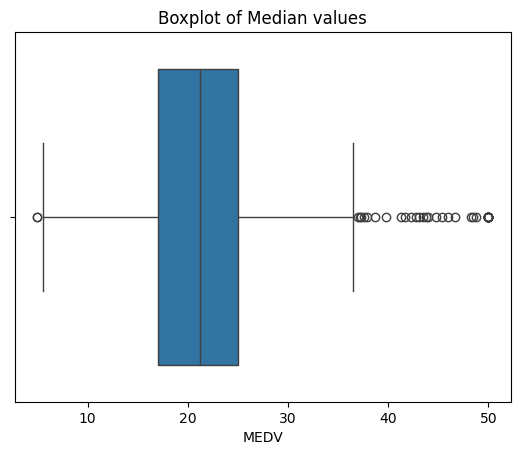

In [19]:
sns.boxplot(x=boston_df['MEDV'])  
pyplot.title('Boxplot of Median values')  # Add a title (optional)
pyplot.show()  # Display the boxplot

2-2. Provide a  bar plot for the Charles river variable

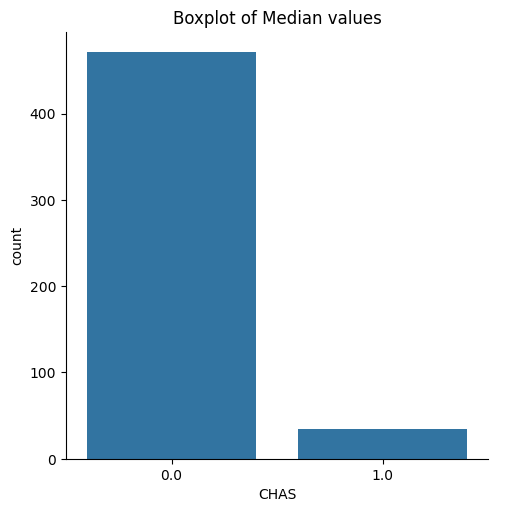

In [28]:
sns.catplot(x="CHAS", kind="count", data=boston_df)
pyplot.title('Boxplot of Median values')  # Add a title (optional)
pyplot.show()  # Display the boxplot

2-3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

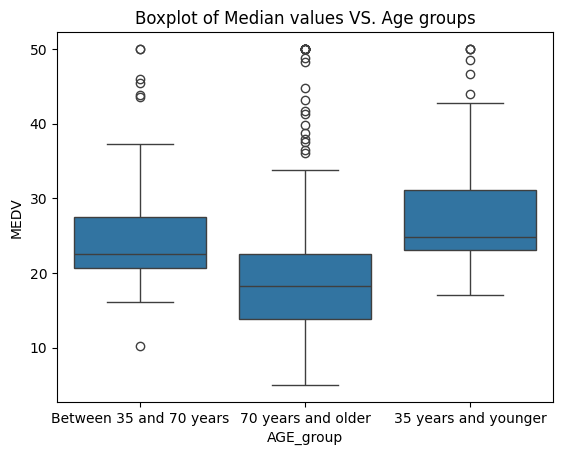

In [21]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_group'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_group'] = '70 years and older'

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median values VS. Age groups')  # Add a title (optional)
pyplot.show()  # Display the boxplot

2-4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

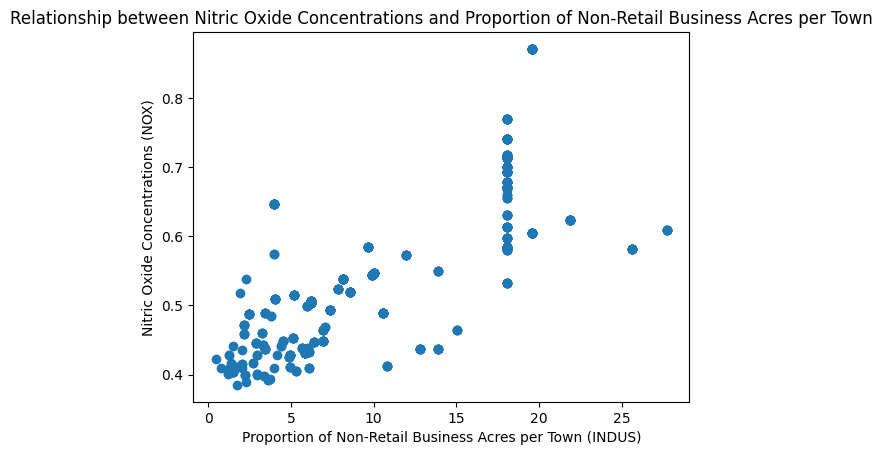

In [22]:
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'])
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.title('Relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town')
pyplot.show()

There is a visible upward pattern (The higher the INDUS, the higher NOX)

2-5. Create a histogram for the pupil to teacher ratio variable

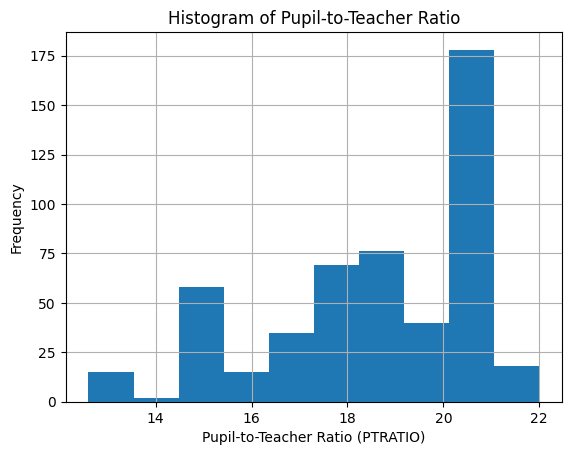

In [23]:
boston_df['PTRATIO'].hist(bins=10)  # Set the number of bins to 10
pyplot.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.show()

3-1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [24]:
bounded_medv = boston_df[boston_df['CHAS'] == 1]['MEDV'] #houses bounded by Charles River
unbounded_medv = boston_df[boston_df['CHAS'] == 0]['MEDV'] #houses not bounded by Charles River
statistic, pvalue = scipy.stats.ttest_ind(bounded_medv, unbounded_medv)
statistic, pvalue

(np.float64(3.996437466090509), np.float64(7.390623170519905e-05))

Since the p-value is less than 0.05, we can reject the null hypothesis. That is, there is a significant difference in median value of houses bounded by the Charles river.

3-2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [25]:
#create arrays for the MEDV values for each AGE group
medv_group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'] 
medv_group2 = boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV']
medv_group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']
f_value, p_value = scipy.stats.f_oneway(medv_group1, medv_group2, medv_group3)
f_value, p_value

(np.float64(36.40764999196599), np.float64(1.7105011022702984e-15))

Since the p-value is less than 0.05, we can reject the null hypothesis.

3-3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [26]:
nox = boston_df['NOX']
indus = boston_df['INDUS']
corr_scipy, pval = scipy.stats.pearsonr(nox, indus)
corr_scipy, pval

(np.float64(0.763651446920915), np.float64(7.913361061241112e-98))

The correlation coefficient (r) of approximately 0.76 indicates a strong positive linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). Also, The p-value (7.913361061210442e-98) is much less than the common significance level of 0.05, which means we can reject the null hypothesis. Therefore, we can conclude that there is a significant positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

3-4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [27]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        19:29:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on these results (p-value of 1.21e-08), we can conclude that there is a significant positive impact of an additional weighted distance (1.0916 for each unit of distance) to the five Boston employment centers on the median value of owner-occupied homes.

https://jupyter.org/try-jupyter/lab/index.html?path=notebooks%2FIBMproject.ipynb